EOSC211

project 1

student name and number: xuebin huang 21936661, maxime rousseau 76799170

sy0 = -3.0 Rp, closest altitude = 364.8 km
sy0 = -6.0 Rp, closest altitude = 300.7 km
sy0 = -12.0 Rp, closest altitude = 266.7 km
sy0 = -24.0 Rp, closest altitude = 248.9 km
sy0 = -48.0 Rp, closest altitude = 238.5 km
sy0 = -96.0 Rp, closest altitude = 238.2 km
sy0 = -192.0 Rp, closest altitude = 235.5 km
sy0 = -384.0 Rp, closest altitude = 227.6 km
sy0 = -768.0 Rp, closest altitude = 228.9 km
sy0 = -1536.0 Rp, closest altitude = 228.1 km
dt = 60.0 s, ac = 238.2 km, error = 22.16 %, elapsed = 0.012 s
dt = 30.0 s, ac = 214.7 km, error = 10.13 %, elapsed = 0.021 s
dt = 15.0 s, ac = 206.6 km, error = 5.93 %, elapsed = 0.042 s
dt = 7.5 s, ac = 202.4 km, error = 3.78 %, elapsed = 0.083 s
dt = 3.8 s, ac = 200.2 km, error = 2.66 %, elapsed = 0.165 s
dt = 1.9 s, ac = 199.1 km, error = 2.11 %, elapsed = 0.348 s
dt = 0.9 s, ac = 198.6 km, error = 1.83 %, elapsed = 0.679 s


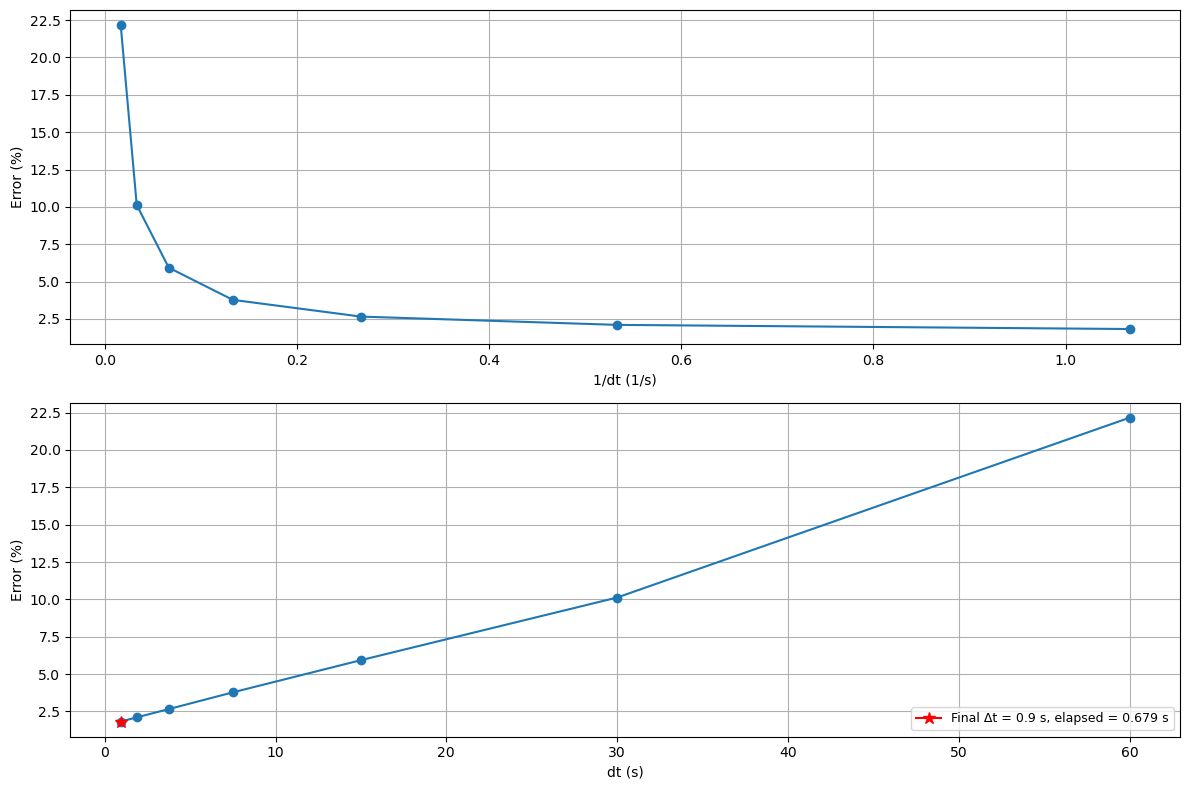

In [1]:
# Part 3B

import time
import matplotlib.pyplot as plt
import numpy as np
import flyby_fns as flyby

# Mercury and trajectory parameters (SI units)
Mp = 3.3e23       # kg
Rp = 2440e3       # 2440 km -> m

# i
sx0 = -3050e3
sy0 = -3 * Rp
tf = 40 * 60

for i in range(10):
    time_arr, acc_arr, vel_arr, pos_arr = flyby.get_traj(sx0, sy0, 0.0, 7e3, 60, tf, Mp, Rp)
    radius = np.sqrt(pos_arr[:,0]**2 + pos_arr[:,1]**2)
    altitude = radius - Rp
    ac = altitude.min() / 1e3
    print(f"sy0 = {sy0/Rp:.1f} Rp, closest altitude = {ac:.1f} km")
    sy0 *= 2 #double the value
    tf *= 2

# ii
sy0 = -96 * Rp
tf = 1280 * 60 # in units seconds
atarget = 195e3
dt = 60

errors, inv_dt, dt_list, elapsed_list= [], [], [], []

while True:
    
    start = time.perf_counter()
    
    time_arr, acc_arr, vel_arr, pos_arr = flyby.get_traj(sx0, sy0, 0.0, 7e3, dt, tf, Mp, Rp)
    radius = np.sqrt(pos_arr[:,0]**2 + pos_arr[:,1]**2)
    altitude = radius - Rp
    ac = altitude.min()
    error = 100 * (ac - atarget) / atarget
    
    elapsed = time.perf_counter() - start

    print(f"dt = {dt:.1f} s, ac = {ac/1e3:.1f} km, error = {error:.2f} %, elapsed = {elapsed:.3f} s")

    errors.append(error)
    inv_dt.append(1/dt)
    dt_list.append(dt)
    elapsed_list.append(elapsed)

    if error <= 2:
        break
    dt /= 2

dt_final = dt_list[-1]
error_final = errors[-1]
elapsed_final = elapsed_list[-1]
# Plot
fig, (ax_top, ax_bot) = plt.subplots(2,1,figsize=(12,8))
ax_top.plot(inv_dt, errors, marker='o')
ax_top.set_xlabel("1/dt (1/s)")
ax_top.set_ylabel("Error (%)")
ax_top.grid(True)

ax_bot.plot(dt_list, errors, marker='o')
ax_bot.plot(dt_final, error_final, marker='*', color='red', markersize=9 , 
            label=f"Final Δt = {dt_final:.1f} s, elapsed = {elapsed_final:.3f} s")
ax_bot.set_xlabel("dt (s)")
ax_bot.set_ylabel("Error (%)")
ax_bot.grid(True)

ax_bot.legend(loc='lower right', fontsize=9)

plt.tight_layout()
plt.show()

# iii Short discussion:
# To speed things up for very large s_y0 while keeping accuracy, we could use a
# variable time step: a larger Δt when the spacecraft is far from the planet and
# a smaller Δt when it is close, where the gravitational force changes rapidly.

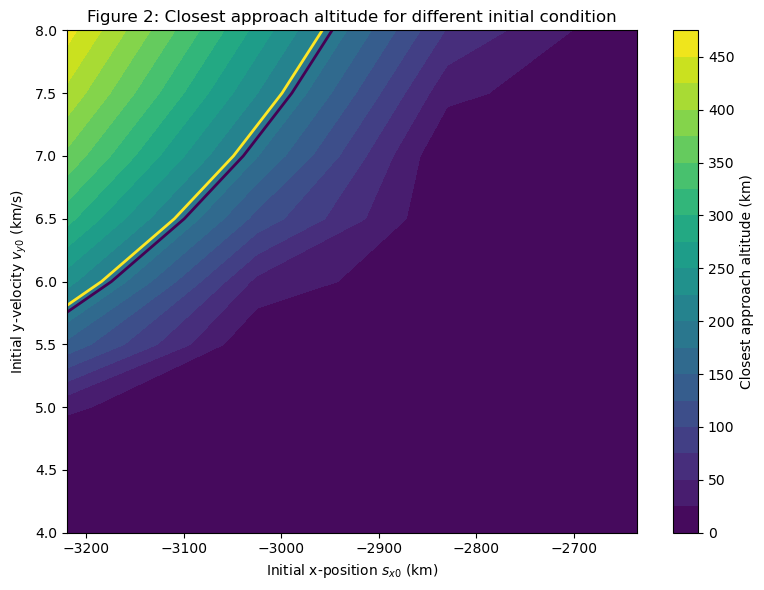

In [2]:
# part 3c
sy0 = -96 * Rp 
tf = 1280 * 60 
atarget = 195e3 
dt = 5.0 
vx0 = 0.0 
# Ranges for initial conditions
vy0_vals = np.arange(4.0, 8.0 + 0.001, 0.5) # km/s
sx0_vals = np.arange(-(Rp/1e3 + 4 * atarget/1e3),
 -(Rp/1e3 + atarget/1e3) + 0.1,
 atarget/1e3) # km

# plot
amin_grid = np.full((len(vy0_vals), len(sx0_vals)), np.nan)
for i, vy0_kms in enumerate(vy0_vals):
 for j, sx0_km in enumerate(sx0_vals):
     sx0 = sx0_km * 1e3 # convert to m
     vy0 = vy0_kms * 1e3 # convert to m/s
     time_arr, acc_arr, vel_arr, pos_arr = flyby.get_traj(
     sx0, sy0, vx0, vy0, dt, tf, Mp, Rp
     )
     radius = np.sqrt(pos_arr[:, 0]**2 + pos_arr[:, 1]**2)
     altitude = radius - Rp # m
     ac = altitude.min() # m
     
     # now set the cases which crash onto planet to be 0 altitude instead of negative values
     if ac <0:
         ac = 0.0
     amin_grid[i, j] = ac / 1e3 # store in km


#  contour map of closest approach altitude 
SX, VY = np.meshgrid(sx0_vals, vy0_vals) # km, km/s
fig, ax = plt.subplots(figsize=(8, 6))
# Main contour map
cs = ax.contourf(SX, VY, amin_grid, levels=20)
cbar = fig.colorbar(cs, ax=ax)
cbar.set_label('Closest approach altitude (km)')
# Highlight region where a_c is within ±5 km of a_target
target_km = atarget / 1e3
highlight_levels = [target_km - 5.0, target_km + 5.0]
ax.contour(SX, VY, amin_grid, levels=highlight_levels, linewidths=2)
ax.set_xlabel('Initial x-position $s_{x0}$ (km)')
ax.set_ylabel('Initial y-velocity $v_{y0}$ (km/s)')
ax.set_title('Figure 2: Closest approach altitude for different initial condition')
plt.tight_layout()
plt.show()


Candidate: sx0=-3220.0 km, vy0=4.0 km/s, arc length=450.7 km
Candidate: sx0=-3220.0 km, vy0=4.5 km/s, arc length=62.2 km
Candidate: sx0=-3025.0 km, vy0=5.0 km/s, arc length=311.1 km
Candidate: sx0=-3025.0 km, vy0=5.5 km/s, arc length=42.6 km
Candidate: sx0=-2830.0 km, vy0=6.0 km/s, arc length=412.1 km
Candidate: sx0=-2830.0 km, vy0=6.5 km/s, arc length=205.1 km
Candidate: sx0=-2830.0 km, vy0=7.0 km/s, arc length=112.6 km
Candidate: sx0=-2635.0 km, vy0=8.0 km/s, arc length=499.7 km


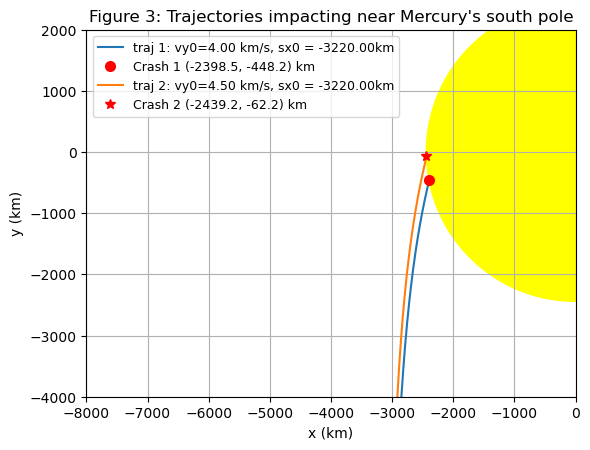

In [3]:
# Part 3D: Ice near Mercury's South Pole

# Design method to find all start conditions that meet the criterion
south_pole = np.array([-Rp, 0.0]) # (x, y) for south pole
candidate_cases = []
for i, vy0_kms in enumerate(vy0_vals):
 for j, sx0_km in enumerate(sx0_vals): 

     if not amin_grid[i, j] == 0:
             continue
     sx0 = sx0_km * 1e3
     vy0 = vy0_kms * 1e3

     
     # Starting position must be less than -1 Rp 
     if sx0 >= -Rp:
         continue
     time_arr, acc_arr, vel_arr, pos_arr = flyby.get_traj(
     sx0, sy0, vx0, vy0, dt, tf, Mp, Rp
     )
     radius = np.sqrt(pos_arr[:, 0]**2 + pos_arr[:, 1]**2)
     altitude = radius - Rp
     crash_indices = np.where(altitude <= 0.0)[0]

     
     if len(crash_indices) == 0:
         continue

     
     crash_idx = crash_indices[0]
     x_c, y_c = pos_arr[crash_idx, 0], pos_arr[crash_idx, 1]

     
     # Project crash point onto the surface
     r_c = np.sqrt(x_c**2 + y_c**2)
     x_s = Rp * x_c / r_c
     y_s = Rp * y_c / r_c

     
     # Angle between south pole vector and crash point vector
     # cos(theta) = (r_sp · r_hit) / (Rp^2) = -x_s / Rp
     cos_theta = -x_s / Rp
     
     theta = np.arccos(cos_theta)
     # Arc length along the surface
     arc_length = Rp * theta # m
     if arc_length < 500e3: # within 500 km of south pole
         candidate_cases.append((sx0, vy0, x_s, y_s, arc_length))
         print(f"Candidate: sx0={sx0/1e3:.1f} km, vy0={vy0/1e3:.1f} km/s, "
         f"arc length={arc_length/1e3:.1f} km")


    # random select two candidates for plotting
     candidate_cases = candidate_cases[:2]




# Plot planet and trajectories; mark crash sites with plotted markers and legend entries only
fig, ax = plt.subplots(figsize=(6, 6))
# Mercury
phi = np.linspace(0.0, 2.0 * np.pi, 400)
ax.fill(Rp * np.cos(phi) / 1e3, Rp * np.sin(phi) / 1e3, color='yellow', zorder=0)

markers = ['o', '*']
for idx, (sx0, vy0, x_s, y_s, arc_length) in enumerate(candidate_cases):
    time_arr, acc_arr, vel_arr, pos_arr = flyby.get_traj(sx0, sy0, vx0, vy0, dt, tf, Mp, Rp)
    radius = np.sqrt(pos_arr[:, 0]**2 + pos_arr[:, 1]**2)
    altitude = radius - Rp
    crash_idx = np.where(altitude <= 0.0)[0][0]
    traj = pos_arr[:crash_idx + 1] / 1e3

    ax.plot(traj[:, 0], traj[:, 1], lw=1.5, label=f"traj {idx+1}: vy0={vy0/1e3:.2f} km/s, sx0 = {sx0/1e3:.2f}km")
    ax.plot(x_s/1e3, y_s/1e3,
            marker=markers[idx % len(markers)],
            color='red',
            markersize=7,
            linestyle='None',
            zorder=3,
            label=f"Crash {idx+1} ({x_s/1e3:.1f}, {y_s/1e3:.1f}) km")

ax.set_aspect('equal', 'box')
ax.set_xlabel('x (km)')
ax.set_ylabel('y (km)')
ax.set_title("Figure 3: Trajectories impacting near Mercury's south pole")
ax.set_xlim(-8000, 0)
ax.set_ylim(-4000, 2000)
ax.legend(loc='upper left', fontsize=9)
ax.grid(True)
plt.tight_layout()
plt.show()

